In [122]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [123]:
result_dir = '../Models/Results/'
files = os.listdir(result_dir)

In [124]:
len(files)/8

26.0

In [125]:
for i in range(len(files)):
    # print(files[i])
    if files[i] == 'README.md':
        continue
    files[i] = [" ".join(files[i].split('_')[:-2]), int(files[i].split('_')[-1]), files[i]]

In [126]:
def open_json(file):
    with open(file, encoding='utf-8') as f:
        data = json.load(f)
    return data

In [127]:
open_json(result_dir + files[0][2])

{'Accuracy Train Dev': 0.7452733362143474,
 'Accuracy Test': 0.6361650485436893,
 'Weighted F1 Train Dev': 0.7456327994832938,
 'Weighted F1 Test': 0.6369593906149363,
 'Macro F1 Train Dev': 0.7449699425630292,
 'Macro F1 Test': 0.6358080097729895,
 'Micro F1 Train Dev': 0.7452733362143474,
 'Micro F1 Test': 0.6361650485436893,
 'Weighted Recall Train Dev': 0.7452733362143474,
 'Weighted Recall Test': 0.6361650485436893,
 'Macro Recall Train Dev': 0.7469156432819516,
 'Macro Recall Test': 0.6395236000167606,
 'Micro Recall Train Dev': 0.7452733362143474,
 'Micro Recall Test': 0.6361650485436893,
 'Confusion Matrix Train Dev': [[13158, 3959], [5472, 14435]],
 'Confusion Matrix Test': [[1246, 606], [893, 1375]]}

In [128]:
def plot(dataset):
    # increase text size
    plt.rc('font', size=50)
    plt.rc('axes', titlesize=50)
    plt.rc('axes', labelsize=50)
    plt.rc('xtick', labelsize=50)
    plt.rc('ytick', labelsize=50)
    plt.rc('legend', fontsize=50)
    plt.rc('figure', titlesize=50)
    sns.set(font_scale=50)
    data_accuracy = {}
    data_f1 = {}
    for file in files:
        name_without_seed = file[0]
        seed = file[1]
        full_name = file[2]
        if dataset.lower() in full_name:
            if name_without_seed not in data_accuracy:
                data_accuracy[name_without_seed] = []
            temp = open_json(result_dir + full_name)
            data_accuracy[name_without_seed].append(temp['Accuracy Test'])
            if name_without_seed not in data_f1:
                data_f1[name_without_seed] = []
            data_f1[name_without_seed].append(temp['Macro F1 Test'])
    # dataframe for accuracy
    df_accuracy = pd.DataFrame(data_accuracy)
    # dataframe for f1
    df_f1 = pd.DataFrame(data_f1)
    # Remove the word 'dynahate' from the column names
    df_accuracy.columns = df_accuracy.columns.str.replace(dataset.lower(), '')
    df_f1.columns = df_f1.columns.str.replace(dataset.lower(), '')
    # Sort the columns by average accuracy
    df_accuracy = df_accuracy.reindex(df_accuracy.mean().sort_values(ascending=False).index, axis=1)
    df_f1 = df_f1.reindex(df_f1.mean().sort_values(ascending=False).index, axis=1)
    plt.figure(figsize=(10, 10))
    sns.set(style="whitegrid")
    ax = sns.barplot(data=df_accuracy, ci="sd", orient='h')
    
    # rotate x-axis labels
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
    # title
    plt.title(dataset)


    ax.set(xlabel='Accuracy', ylabel='Model')
    # plt.tight_layout()
    plt.savefig('Plots/Accuracy_' + dataset + '.pdf', format='pdf', bbox_inches='tight')

    plt.figure(figsize=(10, 10))
    sns.set(style="whitegrid")
    ax = sns.barplot(data=df_f1, ci="sd", orient='h')
    # rotate x-axis labels
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")""
    # title
    plt.title(dataset)
    ax.set(xlabel='Macro F1', ylabel='Model')
    # plt.tight_layout()
    plt.savefig('Plots/F1_' + dataset + '.pdf', format='pdf', bbox_inches='tight')
    return df_accuracy, df_f1

In [129]:
def latex_dfs(df_accuracy, df_f1, save_name):
    df_accuracy = df_accuracy.mean(axis=0).sort_values(ascending=False)
    # series to dataframe
    df_accuracy = df_accuracy.to_frame()
    # rename column
    df_accuracy.columns = ['Accuracy']
    df_f1 = df_f1.mean(axis=0).sort_values(ascending=False)
    # series to dataframe
    df_f1 = df_f1.to_frame()
    # rename column
    df_f1.columns = ['Macro F1']
    # merge on index
    df = pd.merge(df_accuracy, df_f1, left_index=True, right_index=True)
    df.to_latex('Latex/' + save_name + '.tex', index=True, float_format="%.3f")
    df_top = df.head(5)
    df_top.to_latex('Latex/' + save_name + '_top.tex', index=True, float_format="%.3f")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1732\2852632041.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_accuracy, ci="sd", orient='h')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1732\2852632041.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_f1, ci="sd", orient='h')


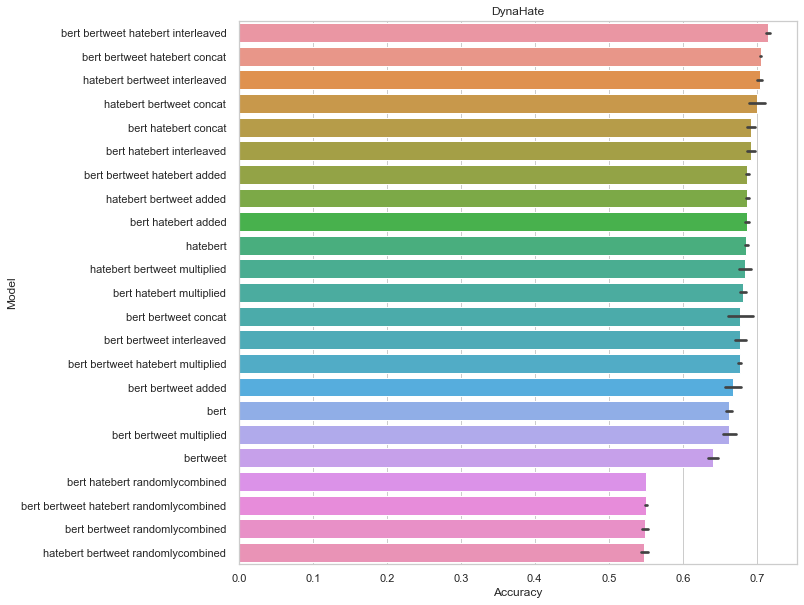

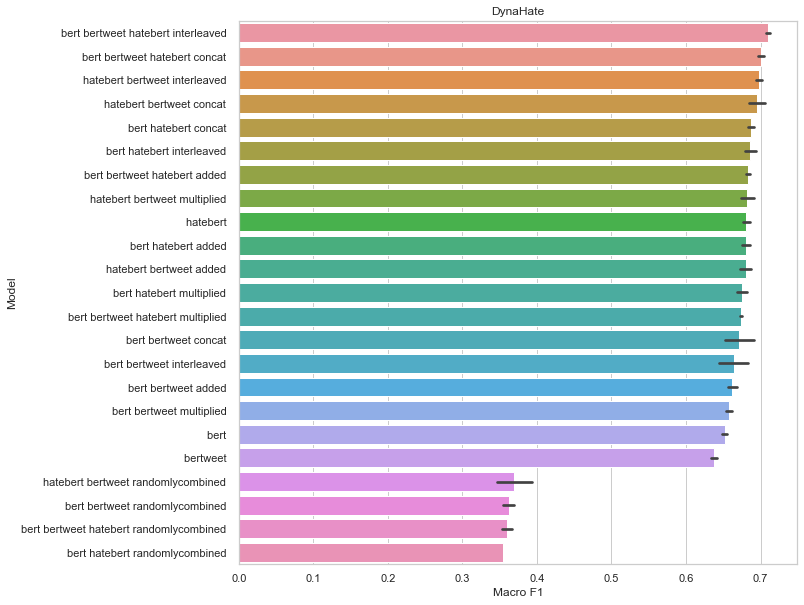

In [130]:
df_accuracy, df_f1 = plot('DynaHate')
latex_dfs(df_accuracy, df_f1, 'DynaHate')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1732\2852632041.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_accuracy, ci="sd", orient='h')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1732\2852632041.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_f1, ci="sd", orient='h')


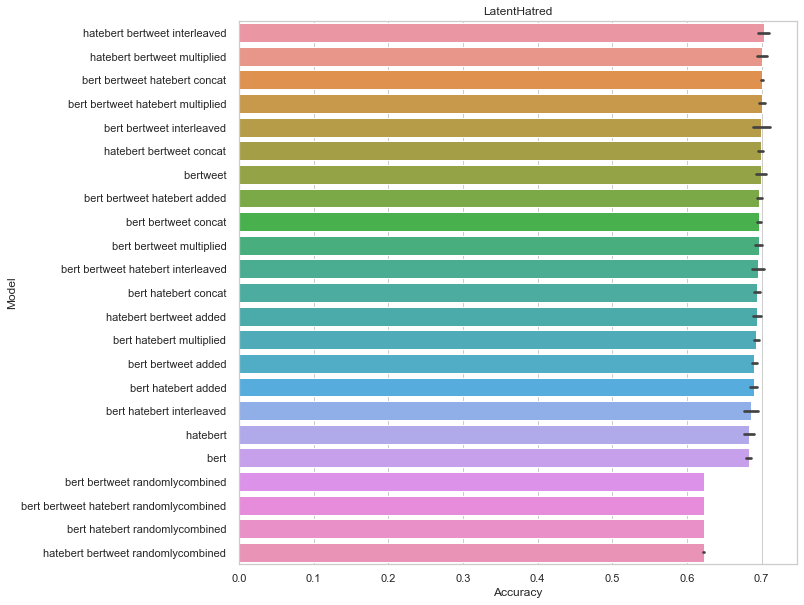

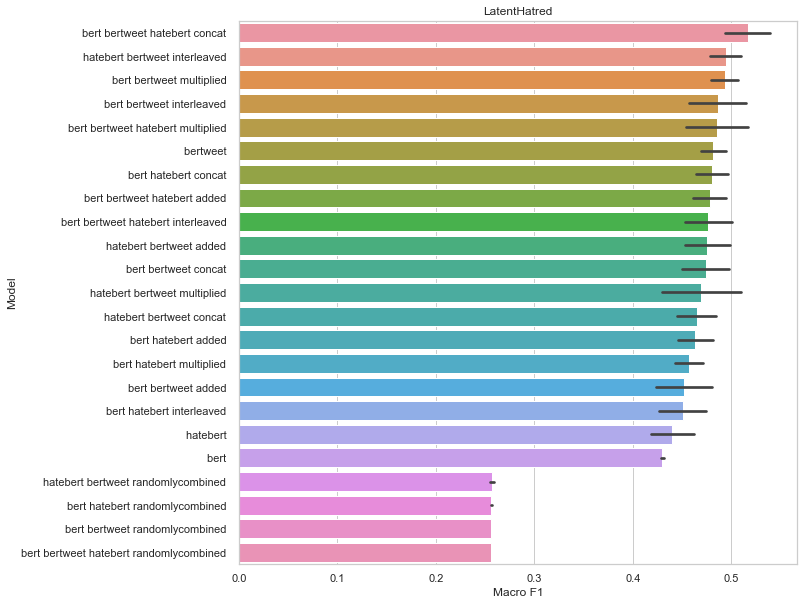

In [131]:
df_accuracy, df_f1 = plot('LatentHatred')
latex_dfs(df_accuracy, df_f1, 'LatentHatred')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1732\2852632041.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_accuracy, ci="sd", orient='h')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1732\2852632041.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df_f1, ci="sd", orient='h')


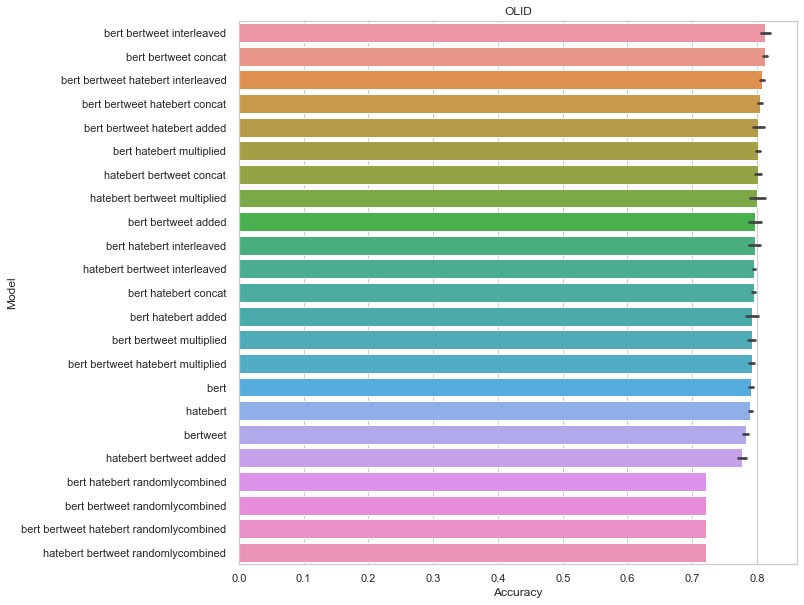

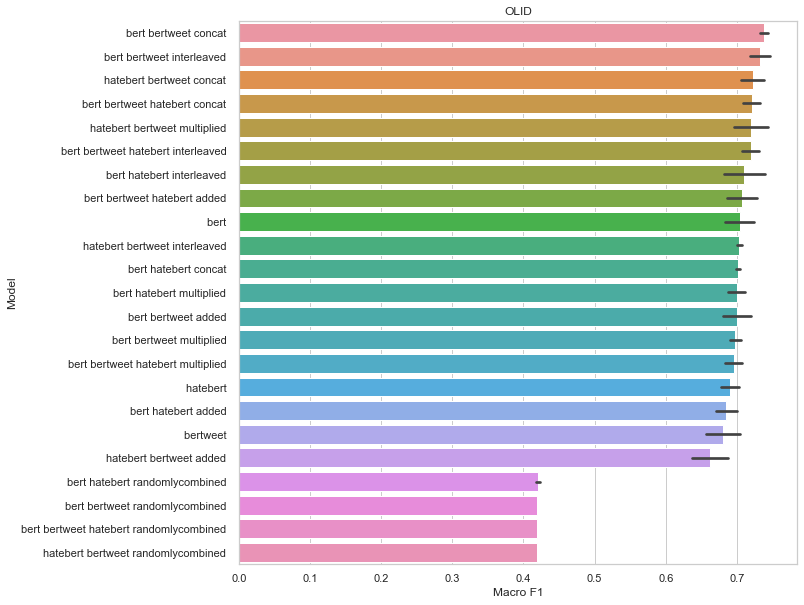

In [132]:
df_accuracy, df_f1 = plot('OLID')
latex_dfs(df_accuracy, df_f1, 'OLID')